In [114]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

In [115]:
_dir = '/Volumes/Windows Dat/TETHER2/'
folder = 'TETHER2_2A.2/'
file = 'SD/A1F3.TXT'

headers = ['t',*[f'BM{i+1}' for i in range(8)],*[f'M_raw{i+1}' for i in range(8)],'beta','alpha','Left FWT Status','Right FWT Status']
df_fti = pd.read_csv(_dir+folder+file,header=None,names = headers)

In [116]:
files = ['ATT','ARSP','AHR2','IMU2']
df=pd.DataFrame()
for s in files:
    file = f'Dataflash CSV/Dataflash{s}.csv'
    df = df.append(pd.read_csv(_dir+folder+file))
df = df.sort_values(by='timestamp')

In [117]:
# get time vector
min_t = int(np.ceil(df['timestamp'].min()))
max_t = int(np.floor(df['timestamp'].max()))
f = 25
N = (max_t-min_t)*f+1
t = np.linspace(0,max_t-min_t,N)
df_interp = pd.DataFrame()
df_interp['t'] = t
df_interp.head(5)

,t
0,0.00
1,0.04
2,0.08
3,0.12
4,0.16


In [118]:
for name in df.columns[2:]:
    ind = ~df[name].isna()
    df_interp[name] = np.interp(t,df[ind]['timestamp']-min_t,df[ind][name])

In [119]:
df_interp

,t,DesRoll,Roll,DesPitch,Pitch,DesYaw,Yaw,ErrRP,ErrYaw,Airspeed,...,AccX,AccY,AccZ,EG,EA,T,GH,AH,GHz,AHz
0,0.00,0.0,-2.074777,0.0,4.500729,0.0,119.792153,0.042729,0.040000,1.737415,...,0.667496,-0.012044,-10.340625,0.0,0.0,0.0,1.0,1.0,753.0,999.0
1,0.04,0.0,-2.135581,0.0,4.342946,0.0,119.719454,0.040000,0.040000,1.385655,...,0.633929,-0.097683,-10.355320,0.0,0.0,0.0,1.0,1.0,753.0,999.0
2,0.08,0.0,-2.190936,0.0,4.181681,0.0,119.790215,0.040000,0.047410,1.563283,...,0.544920,-0.051178,-10.298043,0.0,0.0,0.0,1.0,1.0,753.0,999.0
3,0.12,0.0,-2.261173,0.0,4.031474,0.0,119.746970,0.040000,0.050000,1.931511,...,0.634201,-0.045550,-10.324608,0.0,0.0,0.0,1.0,1.0,753.0,999.0
4,0.16,0.0,-2.328430,0.0,3.896305,0.0,119.735763,0.040000,0.057403,2.162966,...,0.553952,-0.086104,-10.195087,0.0,0.0,0.0,1.0,1.0,753.0,999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22746,909.84,0.0,-2.750826,0.0,2.840553,0.0,69.006092,0.158254,0.210000,1.962077,...,0.622186,0.050197,-10.027473,0.0,0.0,0.0,1.0,1.0,753.0,1000.0
22747,909.88,0.0,-2.801721,0.0,2.974547,0.0,68.964834,0.150000,0.210000,1.796748,...,0.550446,0.107580,-10.034492,0.0,0.0,0.0,1.0,1.0,753.0,1000.0
22748,909.92,0.0,-2.817931,0.0,3.132802,0.0,68.912622,0.150000,0.210000,1.528857,...,0.673428,0.085779,-10.054507,0.0,0.0,0.0,1.0,1.0,753.0,1000.0
22749,909.96,0.0,-2.897583,0.0,3.276251,0.0,68.870308,0.150000,0.210000,1.492646,...,0.726653,0.100355,-10.000177,0.0,0.0,0.0,1.0,1.0,753.0,1000.0


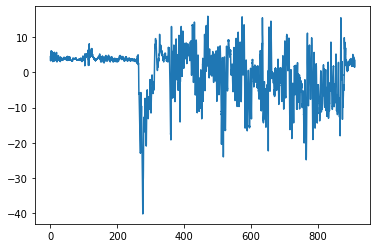

In [126]:
plt.plot(df_interp['t'],df_interp['Pitch'])

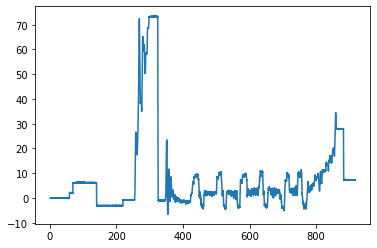

In [124]:
plt.plot(df_fti['t'],df_fti['alpha'])

Text(0, 0.5, 'alpha')

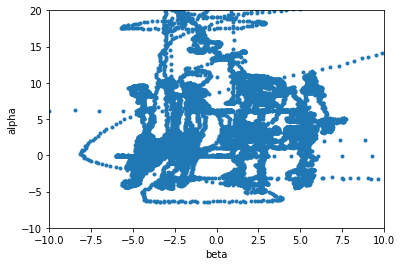

In [58]:
plt.plot(df_fti['beta'],df_fti['alpha'],'.')
plt.xlim([-10,10])
plt.ylim([-10,20])
plt.xlabel('beta')
plt.ylabel('alpha')